# Chapter 6. AI 기초 - 시계열 분석

# 개념 정리

## 시계열 분석이란
* 시간에 따라 관측된 자료(Data)를 시계열 자료라 한다.
* 많은 통계 분석 방법들이 데이터 관측값의 독립성을 가정하고 분석을 진행
* 시간에 따라 관측된 시계열 자료의 경우 관측값들의 연관성을 가지는 경우가 많기 때문에 시계열 분석 진행
* 일반적으로 시계열 분석은 예측에 중점을 둔다.
* 장기적인 관점보다 단기적인 경향성(1, 2 Step)을 파악한 후 실제 값을 비교하여 차이가 발생했다면 위험성 확인

## 시계열 분석 단계
* 모델링 → 예측 → 설명 → 제어

## 시계열 구성 요인
1. 추세 요인(Trend Factor)
2. 순환 요인(Cycle Factor)
3. 계절 요인(Seasonal Factor)
4. 불규칙 요인(Irregular Factor)

## 모형 관점 시계열 분석
1. 가법 모형 : 시계열 구성 요소가 서로 독립일 경우 사용
2. 승법 모형 : 구성 요소가 상호 의존적인 경우 사용(가법 모형의 형태로 변환 가능)

## 정상성(Stationarity)
* 정상성은 멈춰있는가 움직이는가를 의미
* 정상성은 다음 세가지 조건을 만족하는 확률 과정을 정상 시계열이라 한다.
1. 평균이 일정
2. 분산이 일정(분산이 존재하며 해당 값이 상수)
3. 패턴이 일정(두 시점 사이의 자기공분산은 시차에만 의존)

## 차분
* 차분을 진행하면 Trend Factor가 제거된다.
* 정상성을 위해 차분을 진행하여 Trend Factor를 제거해준다.

## 시계열 모형

### AR 모델(Auto Regressive) : 자기회귀 모델
* 과거의 값이 현재의 값에 영향을 미친다는 점을 전제로 과거 값과 현재 값의 관계를 모형화한 모델
* 자기자신(y_t)을 종속변수로 하고, 이전 시점의 시계열(y_t-1, y_t-2, ..., y_t-p)을 독립변수로 갖는 모델

### MA 모델(Moving Average) : 이동평균 모델
* 자기회귀 모델의 과거 값을 대신해 과거 예측 오차(과거의 백색 잡음 값과 현재 값)의 관계를 모형화한 모델
* 자기자신(y_t)을 종속변수로 하고, 해당 시점과 과거의 백색 잡음들(ε_t, ε_t-1, ..., ε_t-p)을 독립변수로 갖는 모델

### ARMA 모델(Auto Regressive and Moving Average) : 자기회귀 이동평균 모델
* ARMA = AR + MA
* 자기자신(y_t)을 종속변수로 하고, 이전 시점의 시계열(y_t-1, y_t-2, ..., y_t-p)과 해당 시점과 과거의 백색 잡음들(ε_t, ε_t-1, ..., ε_t-p)을 독립변수로 갖는 모델

### ARIMA 모델(Auto Regressive Integrated Moving Average)
* 기존 AR, MA, ARMA 모델의 경우 데이터가 정상성을 띄는 경우 가능하므로 비정상인 경우 차분을 통해 데이터를 정상으로 변형한 후 진행
* ARIMA 모델은 ARMA 모델에 차분을 d회 수행한 모델
* Python에는 ARIMA 모델만 구현되어 있고, 다른 모델의 경우 ARIMA 모델을 변형하여 모델링을 진행

## ACF(자기상관함수)와 PACF(부분자기상관함수)

### ACF(자기상관함수)
* ACF는 k시간 단위로 구분된 시계열의 관측치간 상관계수 함수를 의미
* k가 커질수록 ACF는 0에 가까워진다.

### PACF(부분자기상관함수)
* 부분상관(Partial Correlation)이란 두 확률 변수 X와 Y에 의해 다른 모든 변수들이 나타난 상관 관계를 설명하고 난 이후에도 여전히 남아있는 상관 관계라 정의
* PACF는 자기상관함수와 마찬가지로 시계열 관측지 간 상관관계 함수이고, 시차 k에서의 k단계만큼 떨어져 있는 모든 데이터 점들간의 순수한 상관관계를 의미

# ARIMA

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
data = sm.datasets.co2.load_pandas()
data

<class 'statsmodels.datasets.utils.Dataset'>

In [3]:
data.data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [4]:
Y = data.data
Y.head(3)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6


In [5]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


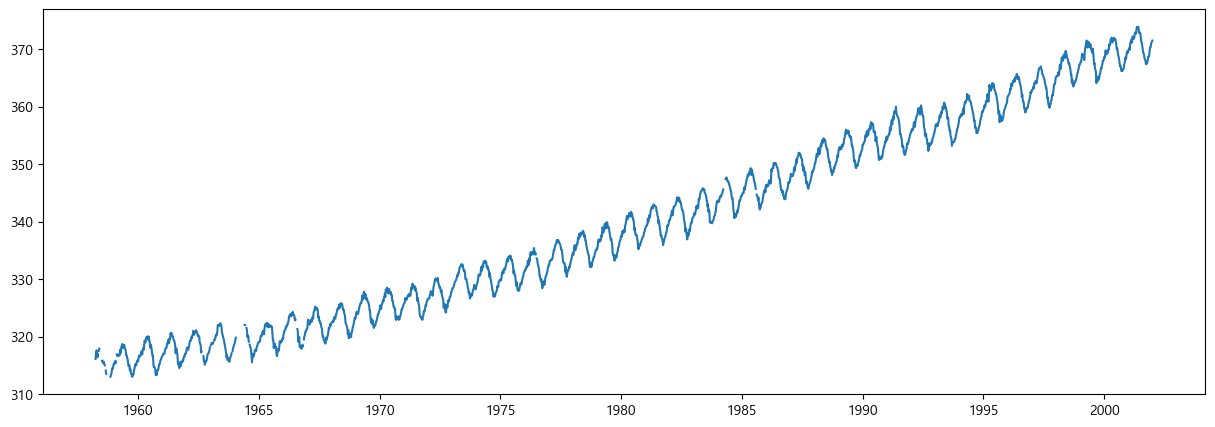

In [6]:
plt.figure(figsize= (15,5))

plt.plot(Y['co2'])

plt.show()

## Missing Data
* ARIMA 모델은 시간 간격이 일정해야 하므로 결측치 제거는 불가능

In [7]:
Y['co2'].isna().sum()

59

<Axes: >

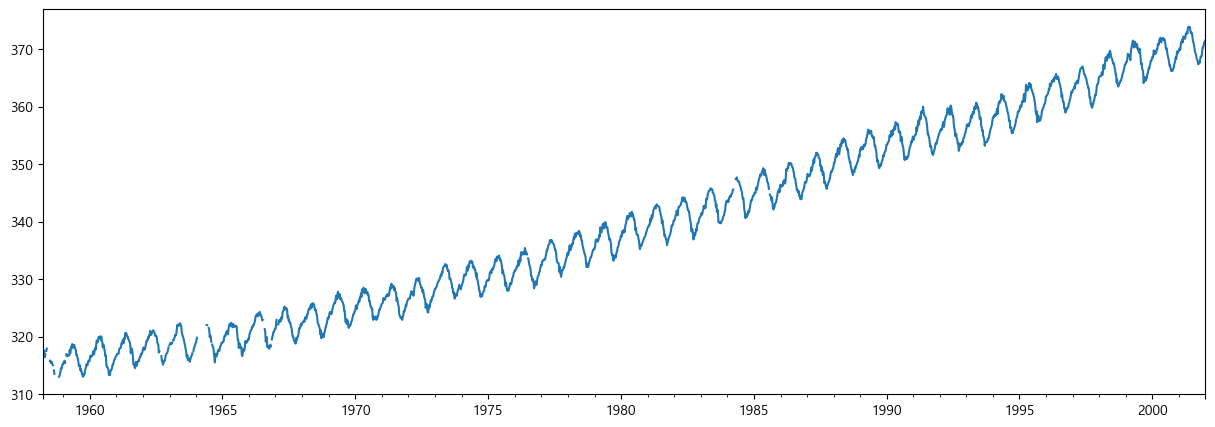

In [8]:
plt.figure(figsize = (15,5))

Y['co2'].resample('W').mean().plot()

* 일주일 간격으로 resample해도 결측값 발견
* 정확도를 살짝 포기하고 기간을 늘려 다시 resample

<Axes: >

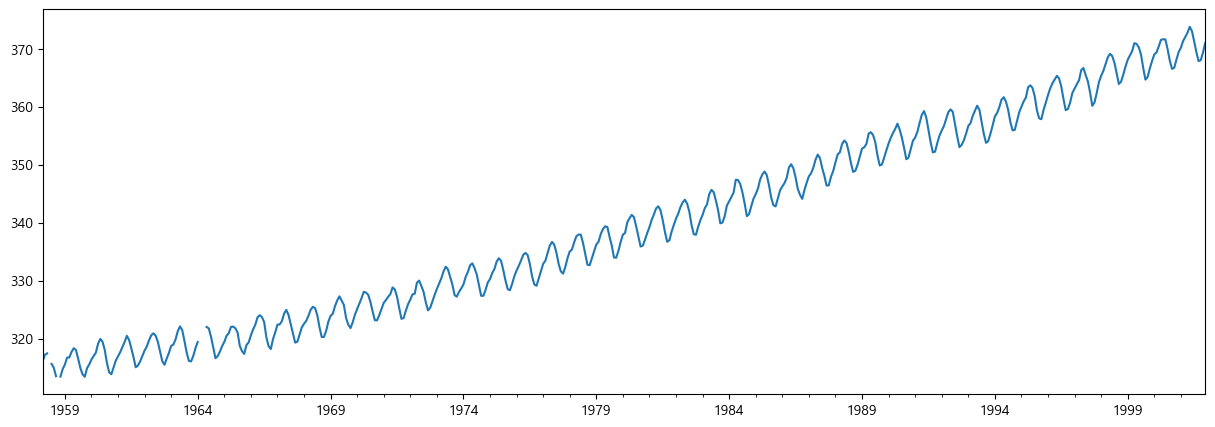

In [9]:
plt.figure(figsize = (15,5))

Y['co2'].resample('M').mean().plot()

* 기간을 늘려도 결측값이 존재하기 때문에 fillna 활용

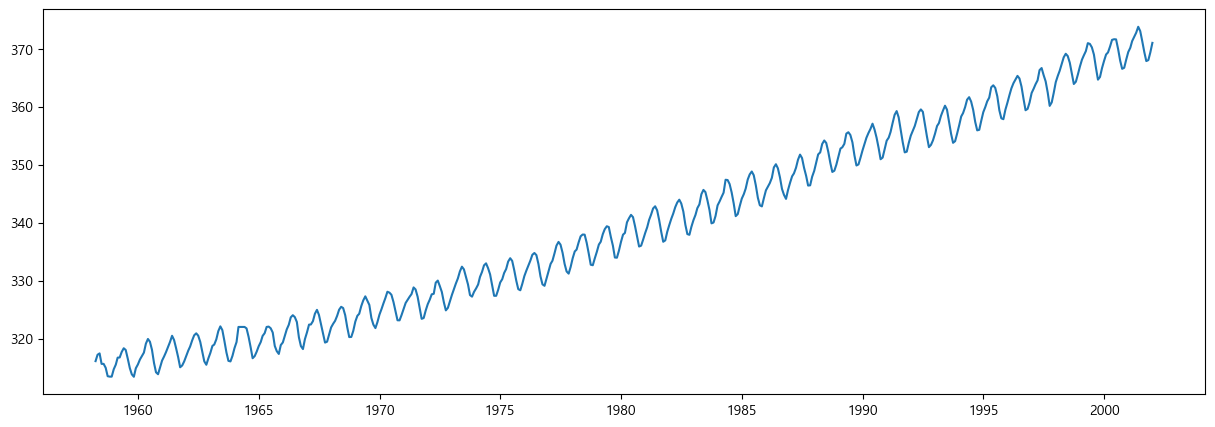

In [10]:
tmp = Y['co2'].resample('M').mean()

Y = tmp.bfill()

plt.figure(figsize= (15,5))

plt.plot(Y)

plt.show()

## Decomposition(분해)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

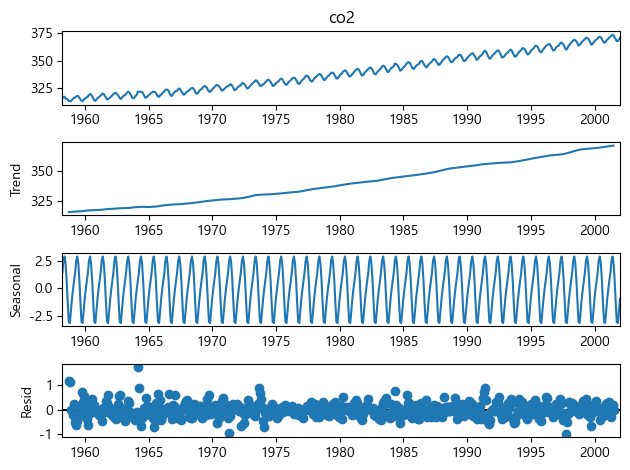

In [12]:
result = seasonal_decompose(Y, model= 'addictive') # 가법(addictive) or 승법(multiplicative) 모형

result.plot()
plt.show()

## ACF, PACF

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

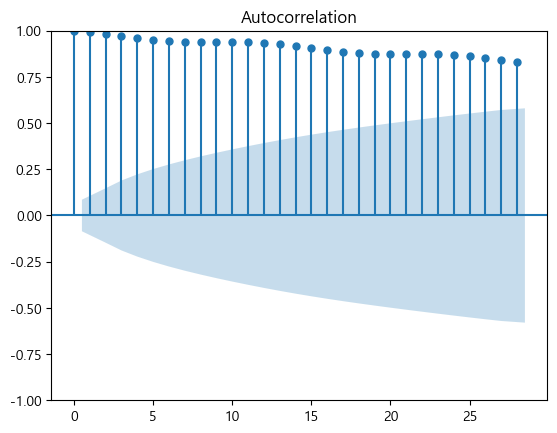

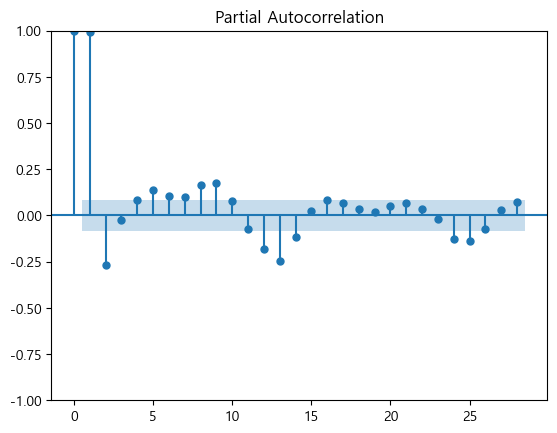

In [14]:
plot_acf(Y)
plot_pacf(Y)
plt.show()

* ACF를 통해 과거와 현재의 큰 차이가 없는 것을 확인
* q = 0(ACF가 점진적으로 감소하므로)
* PACF를 통해 cut-off 가 일어나는 값이 2인 것을 확인
* p = 2(PACF가 cut-off 일어나기 직전 값이 2이므로)

## Dfferencing(차분)
* 데이터가 정상성을 만족할 때까지

### 1차 차분

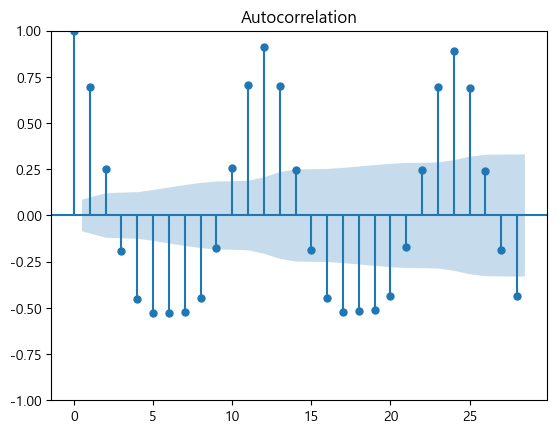

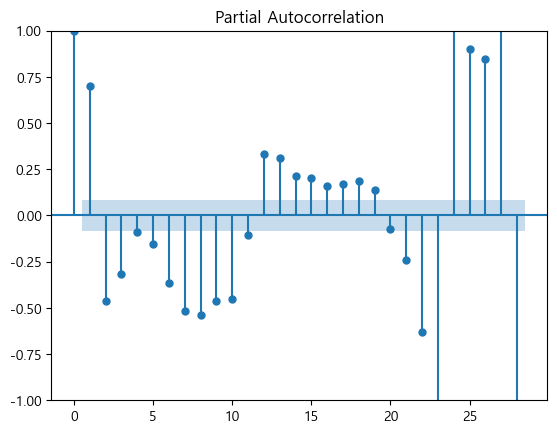

In [15]:
Y_diff = Y.diff()[1:] # period= n : n차 차분

plot_acf(Y_diff)
plot_pacf(Y_diff)
plt.show()

<Axes: >

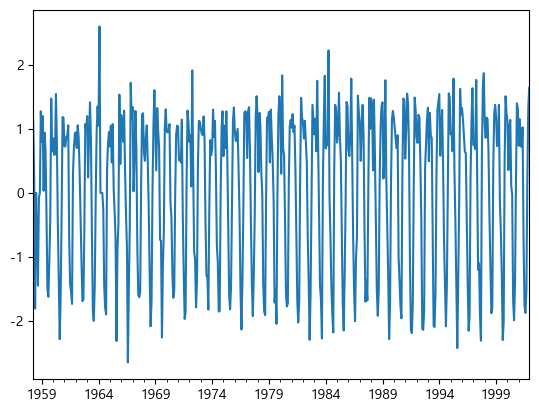

In [16]:
Y_diff.plot()

### 2차 차분

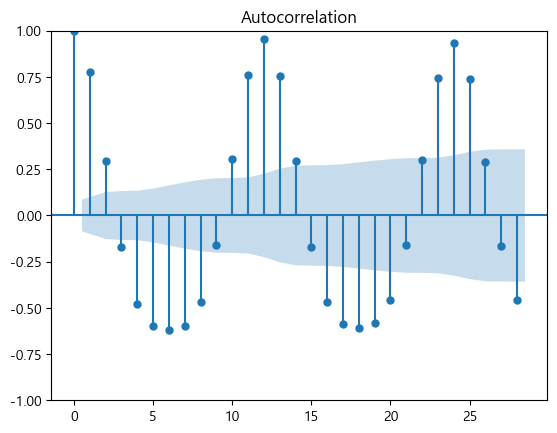

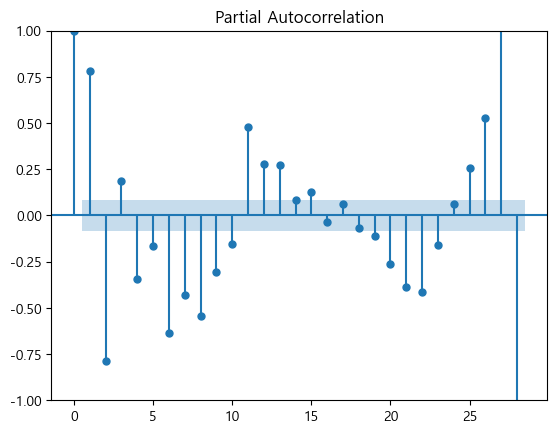

In [17]:
Y_diff = Y.diff(periods= 2)[2:] # period= n : n차 차분

plot_acf(Y_diff)
plot_pacf(Y_diff)
plt.show()

<Axes: >

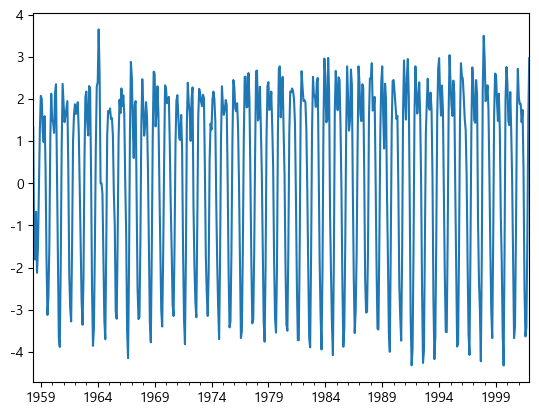

In [18]:
Y_diff.plot()

* 1차 차분과 2차 차분의 형태가 비슷하게 나타남(더 이상 차분해도 달라지는 것이 없음) - 정상 상태
* d = 1(1차 차분으로 정상화)

## Modeling
* q = 0(ACF가 점진적으로 감소하므로)
* p = 2(PACF가 cut-off 일어나기 직전 값이 2이므로)
* d = 1(1차 차분으로 정상화)

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
arima = ARIMA(Y, order= (2, 1, 0)) # (p, d, q)
arima_result = arima.fit()

## Result

In [21]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -599.722
Date:                Wed, 21 Jun 2023   AIC                           1205.443
Time:                        09:44:28   BIC                           1218.233
Sample:                    03-31-1958   HQIC                          1210.451
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0224      0.044     23.454      0.000       0.937       1.108
ar.L2         -0.4589      0.043    -10.666      0.000      -0.543      -0.375
sigma2         0.5738      0.039     14.761      0.000       0.498       0.650
===================================================================================
Ljung-Box (L1) (Q):                  11.56   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.00   Prob(JB):                         0.58
Heteroskedasticity (H):               0.83   Skew:                             0.10
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

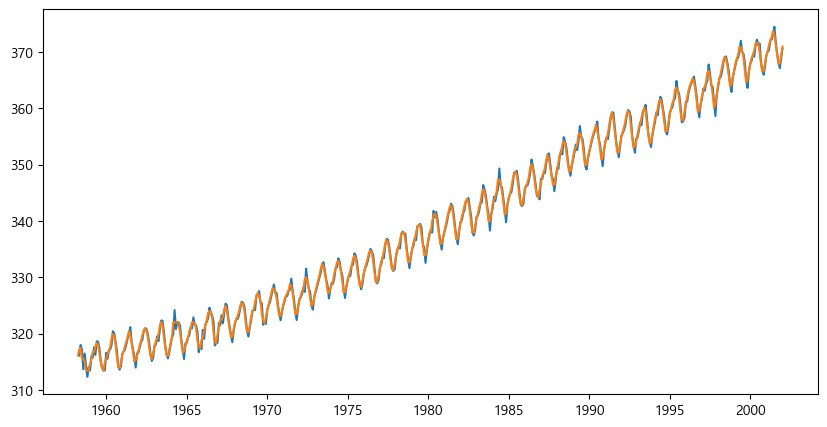

In [22]:
pred = arima_result.predict()

plt.figure(figsize= (10,5))

plt.plot(pred[1:])
plt.plot(Y)

plt.show()

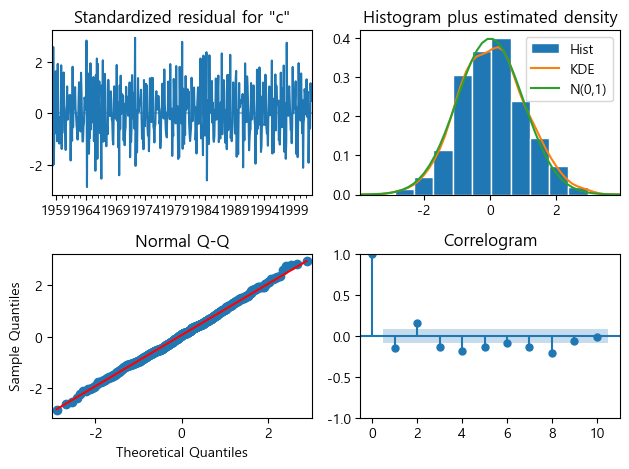

In [23]:
arima_result.plot_diagnostics()
plt.tight_layout()

## Forecast

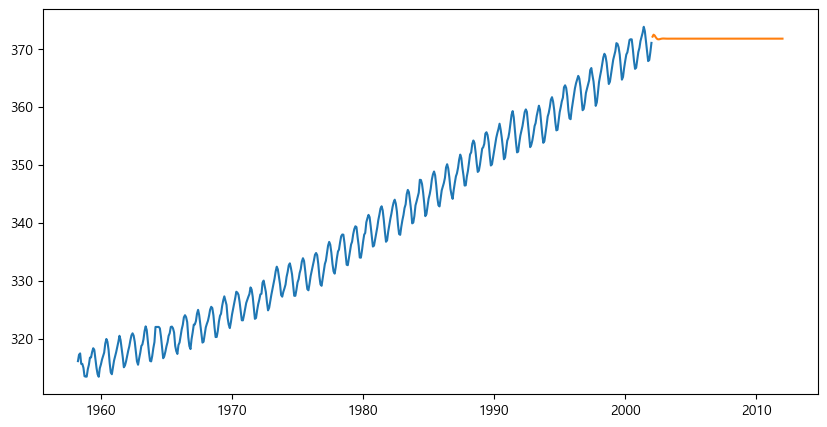

In [24]:
f = arima_result.forecast(steps= 120)

plt.figure(figsize= (10,5))

plt.plot(Y)
plt.plot(f)

plt.show()

In [25]:
gf = arima_result.get_forecast(steps= 120)

In [26]:
gf.predicted_mean

2002-01-31    372.093734
2002-02-28    372.436558
2002-03-31    372.294285
2002-04-30    371.991494
2002-05-31    371.747220
                 ...    
2011-08-31    371.750253
2011-09-30    371.750253
2011-10-31    371.750253
2011-11-30    371.750253
2011-12-31    371.750253
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

In [27]:
gf.conf_int()

,lower co2,upper co2
2002-01-31,370.609032,373.578436
2002-02-28,369.086908,375.786208
2002-03-31,367.173585,377.414985
2002-04-30,365.452502,378.530487
2002-05-31,364.151514,379.342926
...,...,...
2011-08-31,335.130923,408.369583
2011-09-30,334.973330,408.527177
2011-10-31,334.816409,408.684097
2011-11-30,334.660152,408.840354


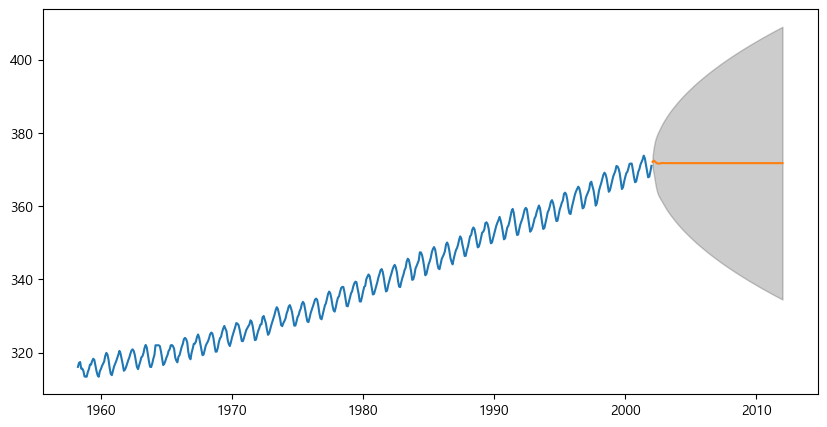

In [28]:
plt.figure(figsize= (10,5))

plt.plot(Y)
plt.plot(gf.predicted_mean)

ci = gf.conf_int()
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1],
                 color= 'black', alpha= 0.2)

plt.show()

* ARIMA 모델은 너무 간단한 모델이기 때문에 예측력이 떨어지는 것을 확인

# SARIMAX

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

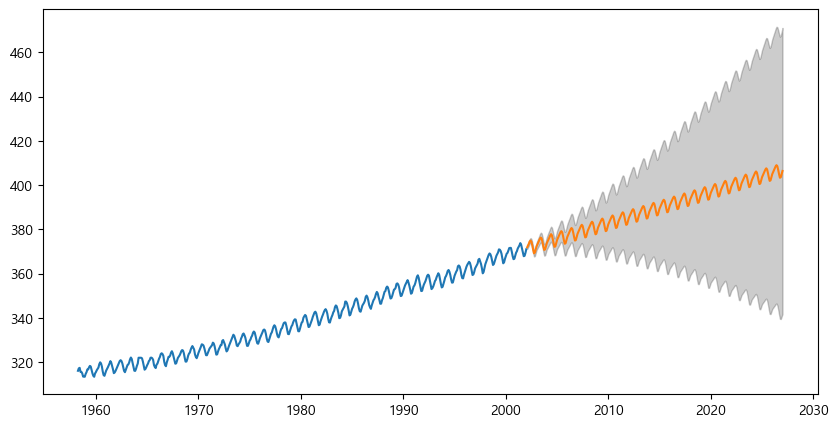

In [30]:
sarima = SARIMAX(Y, order= (2, 1, 0),
                 seasonal_order= (2, 1, 0, 12),
                 enforce_stationarity= False,
                 enforce_invertibility= False)
sarima_result = sarima.fit()

sfore = sarima_result.get_forecast(steps= 300)

plt.figure(figsize= (10,5))

plt.plot(Y)
plt.plot(sfore.predicted_mean)

sci = sfore.conf_int()
plt.fill_between(sci.index, sci.iloc[:,0], sci.iloc[:,1],
                 color= 'black', alpha= 0.2)

plt.show()

* 최신 모델을 활용하면 성능이 확실하게 개선